## ORIE 5580/5581: Homework 3

### Bowen Gao (bg453), Soobin Lee (dyl44)

### Problem 1

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
cmap = plt.get_cmap('Set3')

In [3]:
# the estimate of alpha 
a = 17
c = 13
m = 23

n = [10, 20, 200, 2000]
X = np.empty(n[3])
U = np.empty(n[3])
P = np.empty(np.size(n))

for i in range(np.size(n)):
    X[0] = 2
    for j in range(1, n[i]):
        X[j] = np.mod(a * X[j - 1] + c, m) 
    U = np.divide((X + 1.0), m + 1.0)
    P[i] = np.mean(U[0:n[i]] <= 0.6)

print(P)

[ 0.6    0.7    0.64   0.637]


In [5]:
# the limit of the estimate as n goes to infinity
print("The limit of the estimate is", np.sum(U[0:22] <= 0.6) / 22.0)

The limit of the estimate is 0.636363636364


The estimate of $\alpha$ for 10, 20, 200, and 2000 pseudo-random numbers is 0.6, 0.7, 0.64, and 0.637, respectively. Since the length of the period is 22 and there are only 14 numbers that are less than or equal our threshold of 0.6, the limit of the estimate obtained from the first $n$ pseudo-random numbers produced as $n \rightarrow \infty$ is approximately 0.636.

### Problem 2

#### (a)

The plot of the sequences $x_n$ and $y_n$ is as follows.

In [8]:
# **Code provided by Professor Sid Banerjee**
# Function to generate pseudorandom sequence using LCG
# Setting default parameters to glibc specifications (without truncation)

def LCG(n, m = 2 ** 31 - 1, a = 1103515245, c = 12345, x_0 = 1):
    output = np.zeros(n)

    x = x_0
    for i in range(n):
        output[i] = (x + 1.0) / (m + 1.0)
        x = (a * x + c) % m

    return output

# Functions to visualize LCG sequence on clock
def plot_clock_face(m, fig, annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi / 2 - theta, 1.05), xycoords = 'polar')

def plot_clock_path(m, x, fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0),'gs')
    
    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y, 
                      length_includes_head = True, head_width = 0.05, 
                      head_length = 0.1, fc = color, ec = color)    

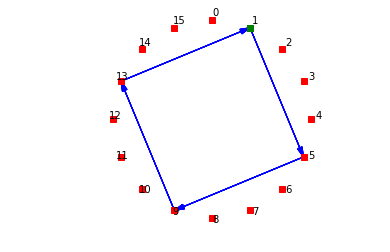

In [9]:
# Plot of sequence x_n
m_x = 16
a_x = 5
c_x = 0
x_0 = 1

fig = plt.figure()
x = LCG(n = m_x + 1, m = m_x, a = a_x, c = c_x, x_0 = x_0)

plot_clock_face(m_x, fig, annotate = True)
plot_clock_path(m_x, x, fig)
plt.axis('equal')
plt.axis('off')
plt.show()

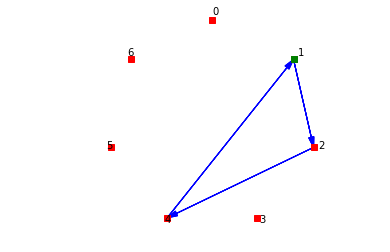

In [10]:
# Plot of sequence y_n
m_y = 7
a_y = 2
c_y = 0
y_0 = 1

fig = plt.figure()
y = LCG(n = m_y + 1, m = m_y, a = a_y, c = c_y, x_0 = y_0)

plot_clock_face(m_y, fig, annotate = True)
plot_clock_path(m_y, y, fig)
plt.axis('equal')
plt.axis('off')
plt.show()

#### (b)

Next, we define a combined LCG as $z_n = (x_n + y_n) \bmod 16$ and plot the sequence $z_n$ using the clock visualization.

In [11]:
def LCG_z(n, m_x = 2 ** 31 - 1, m_y = 2 ** 31 - 1, a_x = 1103515245, a_y =1103515245, c_x = 12345, c_y = 12345, x_0 = 1, y_0 = 1):
    output_z = np.zeros(n)

    x = x_0
    y = y_0
    for i in range(n):
        z = (x + y) % m_x
        output_z[i] = (z + 1.0) / (m_x + 1.0)
        x = (a_x * x + c_x) % m_x
        y = (a_y * y + c_y) % m_y
        
    return output_z

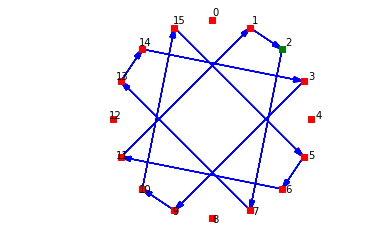

In [12]:
m_x = 16
a_x = 5
c_x = 0
x_0 = 1

m_y = 7
a_y = 2
c_y = 0
y_0 = 1

fig = plt.figure()
z = LCG_z(n = m_x * m_y + 1, m_x = m_x, m_y = m_y, a_x = a_x, a_y = a_y, c_x = c_x, c_y = c_y, x_0 = x_0, y_0 = y_0)

plot_clock_face(m_x, fig, annotate = True)
plot_clock_path(m_x, z, fig)
plt.axis('equal')
plt.axis('off')
plt.show();

#### (c)

The periods of the pseudorandom sequences $x_n$, $y_n$, and $z_n$ are 4, 3, and 12, respectively. Clearly, the resulting period of $z_n$ is on the order of $(4 \cdot 3)$ = 12.

### Problem 3

#### (a)

The following is a method to compute $x_n$ quickly when $n = 2^{138}.$ We are trying to calculate $x_n = [(a^n \bmod m) \cdot x_0] \bmod m$. Using the hint provided, we can see that

\begin{align*}
a^{2^{138}} \bmod m &= (a^{2^{137}} \bmod m)^2 \bmod m \\
a^{2^{137}} \bmod m &= (a^{2^{136}} \bmod m)^2 \bmod m \\
&\: \: \vdots \\
a^{2^{2}} \bmod m &= (a^{2^{1}} \bmod m)^2 \bmod m \\
a^{2^{1}} \bmod m &= (a^{2^{0}} \bmod m)^2 \bmod m. 
\end{align*}

Therefore, when $n = 2^{138}$ and we multiply $a^n \bmod m$ by $x_0 = 3$, we find that $x_n = 1,946,723,422.$

In [9]:
a = 7 ** 5
m = 2 ** 31 - 1
x_0 = 3

x = np.mod(a, m)

for  i in range(1, 139):
    x = np.mod(x ** 2, m)
    
x_n = np.mod(x * x_0, m)

print(x_n)

1946723422


### Problem 4

The p.d.f of the random variable $X$ is given by
$$
f(x) = 
\begin{cases}
ce^x &\text{for } 0 \leq x \leq 1, \\
ce^{2 - x} &\text{for } x > 1, \\
0 &\text{otherwise.}
\end{cases}
$$

#### (a)

First, we solve for the value of constant $c$.

\begin{align*}
\int_{0}^{1} ce^x \: dx + \int_{1}^{\infty} ce^{2 - x} \: dx &= 1 \\
\Rightarrow c(e - 1) + \lim_{t \rightarrow \infty} \int_{1}^{t} ce^{2 - x} \: dx &= 1 \\
\Rightarrow c(e - 1) + ce &= 1 \\
\Rightarrow c &= \frac{1}{2e - 1}.
\end{align*}

#### (b)

For $x \in [0, 1]$,
$$F(x) = \int_{0}^{x} \frac{e^z}{2e - 1} \: dz = \frac{e^x - 1}{2e - 1}.$$

For $x > 1$,
\begin{align*}
F(x) &= \frac{e - 1}{2e - 1} + \int_{1}^{x} \frac{e^{2 - z}}{2e - 1} \: dz \\
&= \frac{e - 1}{2e - 1} - \frac{e^{2 - x} - e}{2e - 1} \\
&= 1 - \frac{e^{2 - x}}{2e - 1}.
\end{align*}

Then, taking the inverse, we find that 

$$
F^{-1}(u) = 
\begin{cases}
\ln (u(2e - 1) + 1) &\text{for } u \in [0, \frac{e - 1}{2e - 1}) \\
2 - \ln ((2e - 1)(1 - u)) &\text{for } u \in [\frac{e - 1}{2e - 1}, 1).
\end{cases}
$$

Therefore, the inversion method is

1. Generate $U \sim U[0, 1]$.

2. For $u \in [0, \frac{e - 1}{2e - 1})$, return $X = \ln (u(2e - 1) + 1).$ <br>
   For $u \in [\frac{e - 1}{2e - 1}, 1)$, return $X = 2 - \ln ((2e - 1)(1 - u)).$

#### (c)

Now, we generate 1,500 samples of $X$ and plot a histogram of them below. We can see that the histogram and the p.d.f follow the same distribution.

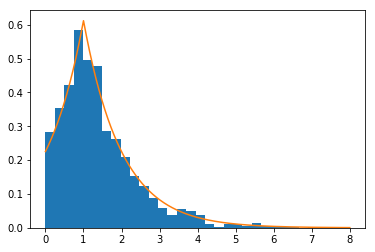

In [36]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

n = 1500

X = np.empty(n)

for i in range(n):
    U = np.random.rand()
    if U < ((np.exp(1) - 1) / (2 * np.exp(1) - 1)):
        X[i] = np.log(U * (2 * np.exp(1) - 1) + 1)
    else:
        X[i] = 2 - np.log((2 * np.exp(1) - 1) * (1 - U))
        
plt.hist(X, bins = 30, normed = 1);  

x_vals = np.linspace(0, 8, 1000)
f_x = np.empty(1000)

for i in range(1000):
    if x_vals[i] <= 1:
        f_x[i] = np.exp(x_vals[i]) / (2 * np.exp(1) - 1)
    else:
        f_x[i] = np.exp(2 - x_vals[i]) / (2 * np.exp(1) - 1)
        
plt.plot(x_vals, f_x)
plt.show()